In [1]:
from pprint import pprint as print

In [2]:
# Load environment variables
from dotenv import load_dotenv
load_dotenv()

True

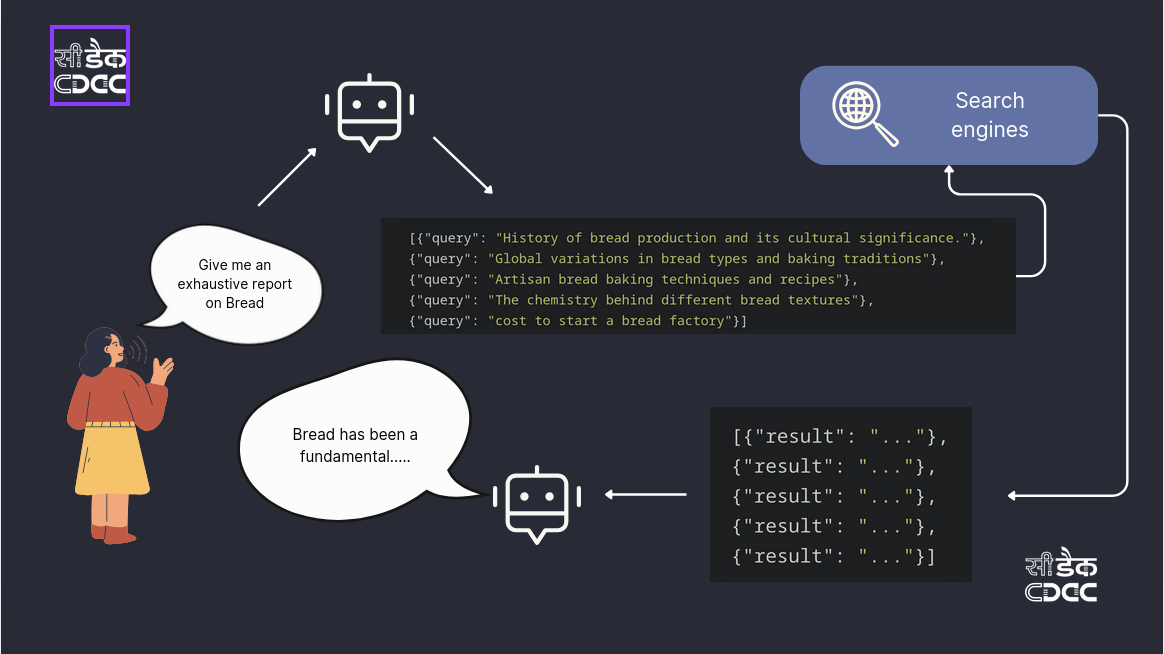

# Define Tools

Tavily is a very simple search engine optimized for LLMs.

They are natively coded for agentic architectures, they have a generous free tier you can take advantage of.

In [3]:
from langchain_community.tools.tavily_search import TavilySearchResults
tools = [TavilySearchResults(max_results=3)]

# Lets create our reasoning Engine

In [4]:
from langchain_groq import ChatGroq

reasoning_engine = ChatGroq(model="llama-3.3-70b-versatile")

## Lets define our tools

In [ ]:
from typing import List
from pydantic import BaseModel, Field


# This is our tool, LLM will output in this specific format
class Queries(BaseModel):
    """"
    This paradigm where the AI agent provides its reasoning first
    and their actions later is called 
    ReAct: Reasoning and Action
    In here action is the query
    """
    reasoning: str = Field(description="Reasoning for choosing the \
                           5 given queries")
    query: List[str] = Field(description="List of 5 search queries\
                              related to the original query")

In [6]:
from langchain.prompts import ChatPromptTemplate
reasoning_engine_with_tools = reasoning_engine.bind_tools(tools=[Queries])

system_prompt = "You are a helpful ai agent responsible for generating 5 different queries based on the initial query"
human_prompt="Query: {query}"

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", human_prompt)
    ]
)

runnable = prompt | reasoning_engine_with_tools

In [7]:
out = runnable.invoke({"query": "what are the best crops for loamy soil"})

In [8]:
print("REASONING")
print(out.tool_calls[0]['args']['reasoning'])
print("")
print("Queries")
for query in out.tool_calls[0]['args']['query']:
    print(query)

'REASONING'
('To provide the best possible answer, I have chosen these 5 queries because '
 'they are all related to the original query and cover different aspects of '
 'the topic, including crop selection, farming tips, and profitability.')
''
'Queries'
'best crops for loamy soil'
'loamy soil crop selection'
'crops suitable for loamy soil'
'loamy soil farming tips'
'most profitable crops for loamy soil'


Tavily is a very simple search engine optimized for LLMs.

They are natively coded for agentic architectures, they have a generous free tier you can take advantage of.

In [ ]:
from langchain_tavily import TavilySearch
tool = TavilySearch(
    max_results=5,
    topic="general"
)

In [10]:
tavily_search_results = []
for query in out.tool_calls[0]['args']['query']:
    tavily_search_results.append(tool.invoke(query))

In [11]:
tavily_search_results

[{'query': 'best crops for loamy soil',
  'follow_up_questions': None,
  'answer': None,
  'images': [],
  'results': [{'title': 'The Complete Guide on Crops Suitable for Loamy Soil',
    'url': 'https://agriculturegoods.com/the-complete-guide-on-crops-suitable-for-loamy-soil/',
    'content': 'Loam soil is considered ideal for use in planting and farming, as it preserves nutrients well and retains water while allowing excess water to drain away. Loam soil is known as the best planting medium for many plants to grow. The sand content holds the loam flexible so that air, humidity, and sunlight can enter the plants, while the soil content of clay and silt slows down drainage and evaporation, trapping water and nutrients in place. Loam soils with high quantities of clay provide less aeration for plants, insects and soil species. Cropping in Loam soil Loam soil provides the soil conditions needed for plants to produce ample crops during the growing season. Planting trees in Loam soil',
   

In [12]:
tavily_search_results_as_str = ""
for i in tavily_search_results:
    query = i['query']
    tavily_search_results_as_str += f"Query: {query}\n"
    response: List = i['results']
    for result in response:
        title = result['title']
        tavily_search_results_as_str += f"Title: {title}\n"
        content = result['content']
        tavily_search_results_as_str += f"Content: {content}"
        tavily_search_results_as_str += "\n#############################"


In [14]:
print(tavily_search_results_as_str)

('Query: best crops for loamy soil\n'
 'Title: The Complete Guide on Crops Suitable for Loamy Soil\n'
 'Content: Loam soil is considered ideal for use in planting and farming, as '
 'it preserves nutrients well and retains water while allowing excess water to '
 'drain away. Loam soil is known as the best planting medium for many plants '
 'to grow. The sand content holds the loam flexible so that air, humidity, and '
 'sunlight can enter the plants, while the soil content of clay and silt slows '
 'down drainage and evaporation, trapping water and nutrients in place. Loam '
 'soils with high quantities of clay provide less aeration for plants, insects '
 'and soil species. Cropping in Loam soil Loam soil provides the soil '
 'conditions needed for plants to produce ample crops during the growing '
 'season. Planting trees in Loam soil\n'
 '#############################Title: List OF Crops Suitable for Loam Soil - '
 'Agrolearner.com\n'
 'Content: Top 10 Plants for Loamy Soil Remember,

In [19]:
# New task for our reasoning engine, give answer to the original question asked by the person
from langchain.prompts import ChatPromptTemplate

system_prompt = "You are a helpful AI assistant, from the given content, answer the question asked by the user"
human_prompt = "<CONTENT> {content} </CONTENT>\n\n Question: {query}"

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", human_prompt)
    ]
)


runnable = prompt | reasoning_engine


In [ ]:
print(runnable.invoke(
    {
        "content": tavily_search_results_as_str, 
        "query": "what are the best crops for loamy soil"
    }
    ).content)

('Based on the content provided, some of the best crops for loamy soil are:\n'
 '\n'
 '1. Heirloom tomatoes\n'
 '2. Mushrooms (such as oyster or shiitake)\n'
 '3. Strawberries\n'
 '4. Tomatoes\n'
 '5. Lettuce\n'
 '6. Spinach\n'
 '7. Kale\n'
 '8. Brussel sprouts\n'
 '9. Kohlrabi\n'
 '10. Delphinium\n'
 '\n'
 'Additionally, loamy soil is considered ideal for most vegetables and can be '
 'used for a wide range of crops, including:\n'
 '\n'
 '* Root vegetables such as carrots and beets\n'
 '* Leafy greens such as lettuce and spinach\n'
 '* Brassicas such as broccoli and cauliflower\n'
 '* Fruiting crops such as tomatoes and peppers\n'
 '* Legumes such as beans and peas\n'
 '\n'
 "It's worth noting that the specific crops that will do well in loamy soil "
 'can vary depending on factors such as climate, temperature, and moisture '
 'levels. However, in general, loamy soil is considered a versatile and '
 'fertile soil type that can support a wide range of crops.')
